### Data Science And Big Data Analytics Practical 2
                                   
===============================================================================================================================

==============================================================================================================================
### Problem Statement:-
#### Perform the following operations using Python on any open source dataset (eg. data.csv)
#### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 
#### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 
#### 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url_link = 'prac2.csv'
df=pd.read_csv(url_link)

In [3]:
df.head(20)

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks
0,1,Mohammed,M,Comp,72.0,62.0,98.0,63.0,89.0,62.0
1,2,Reyansh,M,IT,58.0,62.0,83.0,83.0,88.0,58.0
2,3,Aarav,M,IT,57.0,-20.0,100.0,NaN,56.0,100.0
3,4,Atharv,M,IT,60.0,89.0,83.0,70.0,33.0,85.0
4,5,Vivaan,M,Comp,85.0,90.0,NaN,78.0,23.0,60.0
5,6,Advik,M,ENTC,94.0,99.0,84.0,100.0,56.0,NaN
6,7,Ansh,M,ENTC,98.0,88.0,95.0,81.0,78.0,-13.0
7,8,Ishaan,M,ENTC,75.0,66.0,66.0,83.0,-99.0,56.0
8,9,Dhruv,M,ENTC,63.0,NaN,NaN,97.0,56.0,33.0
9,10,Siddarth,M,ENTC,96.0,67.0,78.0,95.0,NaN,23.0


In [4]:
df.shape

(20, 10)

In [5]:
df.dtypes.value_counts()

float64    6
object     3
int64      1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rollno      20 non-null     int64  
 1   Name        20 non-null     object 
 2   Gender      20 non-null     object 
 3   Branch      20 non-null     object 
 4   Attendance  20 non-null     float64
 5   Phy_marks   19 non-null     float64
 6   Che_marks   17 non-null     float64
 7   EM1_marks   18 non-null     float64
 8   PPS_marks   19 non-null     float64
 9   SME_marks   18 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.7+ KB


In [7]:
df.describe()

,Rollno,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks
count,20.00000,20.000000,19.000000,17.000000,18.000000,19.000000,18.000000
mean,10.50000,75.100000,63.421053,81.647059,83.444444,61.052632,52.055556
std,5.91608,14.660724,34.940133,12.036098,11.078449,43.767661,37.805185
min,1.00000,53.000000,-34.000000,60.000000,63.000000,-99.000000,-23.000000
25%,5.75000,63.750000,59.000000,70.000000,75.750000,56.000000,38.000000
50%,10.50000,73.000000,67.000000,83.000000,83.000000,66.000000,61.000000
75%,15.25000,87.000000,88.000000,93.000000,93.000000,87.500000,77.750000
max,20.00000,98.000000,99.000000,100.000000,100.000000,99.000000,100.000000


In [8]:
df.isnull().sum()

Rollno        0
Name          0
Gender        0
Branch        0
Attendance    0
Phy_marks     1
Che_marks     3
EM1_marks     2
PPS_marks     1
SME_marks     2
dtype: int64

In [9]:
data=df
coln=[]
miss=[]
coln.extend(data.columns)
#print(miss)
for i in coln:
    t=data[i].isnull().sum()
    if t!=0:
        miss.append(i)
    else:
        continue
print(miss)

['Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']


In [10]:
pd.options.mode.chained_assignment = None
for j in miss:
    q=data[j].dtypes
    if (q=='int64' or q=='float64') :
        f=data[j]
        for k in range(data.shape[0]):
            if (f[k]<0 or f[k]>100) :
                f[k]=(np.nan)
    else:
        continue

In [11]:
for j in miss:
    q=data[j].dtypes
    if (q=='int64' or q=='float64') :
        data[j].fillna((data[j].mean()),inplace=True)
    else:
        data.fillna(method='bfill')
data.head(10)

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,62.0
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,58.0
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,100.0
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,85.0
4,5,Vivaan,M,Comp,85.0,90.000000,81.647059,78.000000,23.000000,60.0
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,66.2
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,66.2
7,8,Ishaan,M,ENTC,75.0,66.000000,66.000000,83.000000,69.944444,56.0
8,9,Dhruv,M,ENTC,63.0,74.058824,81.647059,97.000000,56.000000,33.0
9,10,Siddarth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.944444,23.0


In [12]:
data['Total Marks']=data['Phy_marks']+data['Che_marks']+data['EM1_marks']+data['PPS_marks']+data['SME_marks']
data['Percentage']=data['Total Marks']/5

In [13]:
data

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,62.0,374.000000,74.800000
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,58.0,374.000000,74.800000
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,100.0,413.503268,82.700654
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,85.0,360.000000,72.000000
4,5,Vivaan,M,Comp,85.0,90.000000,81.647059,78.000000,23.000000,60.0,332.647059,66.529412
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,66.2,405.200000,81.040000
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,66.2,408.200000,81.640000
7,8,Ishaan,M,ENTC,75.0,66.000000,66.000000,83.000000,69.944444,56.0,340.944444,68.188889
8,9,Dhruv,M,ENTC,63.0,74.058824,81.647059,97.000000,56.000000,33.0,341.705882,68.341176
9,10,Siddarth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.944444,23.0,332.944444,66.588889


<AxesSubplot:>

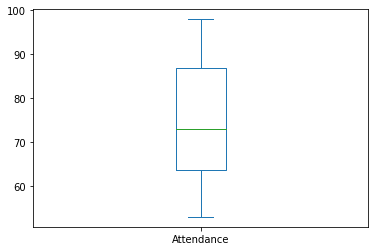

In [14]:
data['Attendance'].plot(kind='box')

<AxesSubplot:>

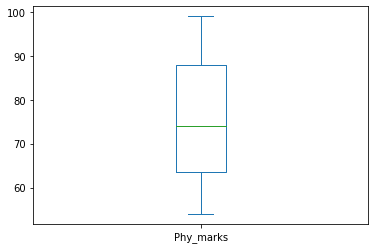

In [15]:
data['Phy_marks'].plot(kind='box')

<AxesSubplot:>

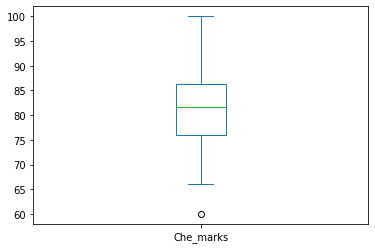

In [16]:
data['Che_marks'].plot(kind='box')

<AxesSubplot:>

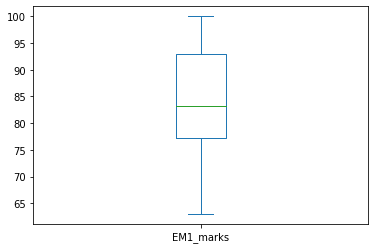

In [17]:
data['EM1_marks'].plot(kind='box')

<AxesSubplot:>

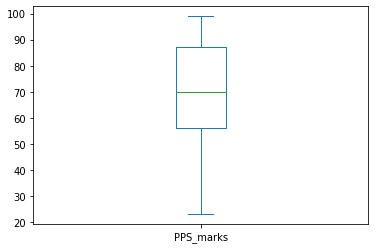

In [18]:
data['PPS_marks'].plot(kind='box')

<AxesSubplot:>

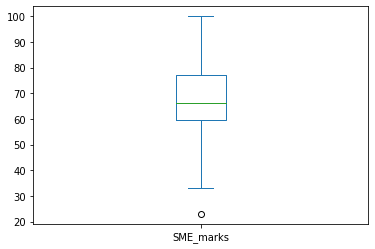

In [19]:
data['SME_marks'].plot(kind='box')

<AxesSubplot:>

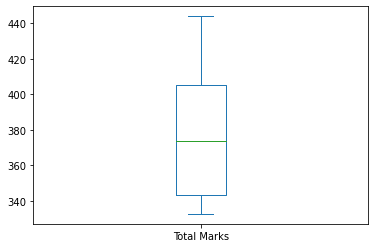

In [20]:
data['Total Marks'].plot(kind='box')

<AxesSubplot:>

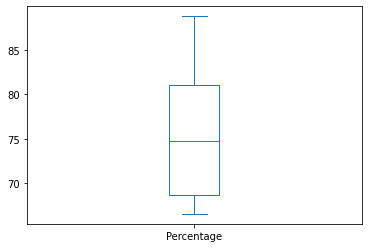

In [21]:
data['Percentage'].plot(kind='box')

In [22]:
Q1 = data['Attendance'].quantile(0.25)
Q3 = data['Attendance'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR
print("Q1 :",Q1,"\nQ3 :",Q3,"\nIQR :",IQR,"\nLower_limit :",Lower_limit,"\nUpper_limit:",Upper_limit)

Q1 : 63.75 
Q3 : 87.0 
IQR : 23.25 
Lower_limit : 28.875 
Upper_limit: 121.875


In [23]:
data[(data['Attendance']<Lower_limit)|(data['Attendance']>Upper_limit)]

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage


In [24]:
data=data[(data['Attendance']>Lower_limit)&(data['Attendance']<Upper_limit)]
data[60:70]

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage


<AxesSubplot:>

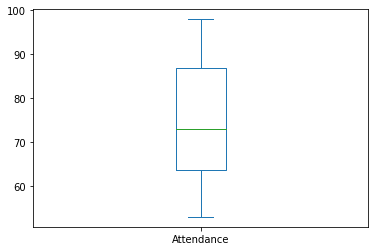

In [25]:
data['Attendance'].plot(kind='box')

In [26]:
Q1 = data['Che_marks'].quantile(0.25)
Q3 = data['Che_marks'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR
print("Q1 :",Q1,"\nQ3 :",Q3,"\nIQR :",IQR,"\nLower_limit :",Lower_limit,"\nUpper_limit:",Upper_limit)

Q1 : 76.0 
Q3 : 86.25 
IQR : 10.25 
Lower_limit : 60.625 
Upper_limit: 101.625


In [27]:
data[(data['Che_marks']<Lower_limit)|(data['Che_marks']>Upper_limit)]

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
14,15,Maryam,F,IT,64.0,87.0,60.0,90.0,65.0,64.0,366.0,73.2


In [28]:
data=data[(data['Che_marks']>Lower_limit)&(data['Che_marks']<Upper_limit)]
data[140:170]

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage


<AxesSubplot:>

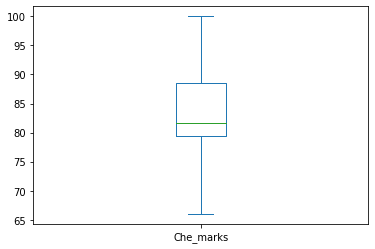

In [29]:
data['Che_marks'].plot(kind='box')

In [30]:
Q1 = data['EM1_marks'].quantile(0.25)
Q3 = data['EM1_marks'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR
print("Q1 :",Q1,"\nQ3 :",Q3,"\nIQR :",IQR,"\nLower_limit :",Lower_limit,"\nUpper_limit",Upper_limit)

Q1 : 76.5 
Q3 : 93.0 
IQR : 16.5 
Lower_limit : 51.75 
Upper_limit 117.75


In [31]:
data[(data['EM1_marks']<Lower_limit)|(data['EM1_marks']>Upper_limit)]

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage


In [32]:
data=data[(data['EM1_marks']>Lower_limit)&(data['EM1_marks']<Upper_limit)]
data[150:160]

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage


<AxesSubplot:>

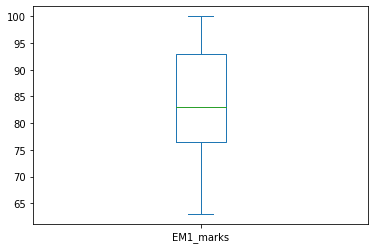

In [33]:
data['EM1_marks'].plot(kind='box')

In [34]:
def BinningFunction(column,cut_points,labels=None):
    minper=column.min()
    maxper=column.max()
    break_points=[minper]+cut_points+[maxper]
    print("Gradding According to percentage \n>60 = F \n60-70 = B \n70-80 = A\n80-100 = O")
    t=pd.cut(column,bins=break_points,labels=labels,include_lowest=True)
    return t

In [35]:
cut_points=[60,70,80]
labels=['F','B','A','O']
data["Grade"]=BinningFunction(data['Percentage'],cut_points,labels)
data

Gradding According to percentage 
>60 = F 
60-70 = B 
70-80 = A
80-100 = O


ValueError: bins must increase monotonically.

In [36]:
new_data1=data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
column=['Attendance','Phy_marks','Che_marks','EM1_marks','PPS_marks','SME_marks','Total Marks']
scaler.fit(new_data1[column])
new_data1[column] = scaler.transform(new_data1[column])
new_data1

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,0.422222,0.177778,0.941176,0.000000,0.868421,0.506494,0.371368,74.800000
1,2,Reyansh,M,IT,0.111111,0.177778,0.500000,0.540541,0.855263,0.454545,0.371368,74.800000
2,3,Aarav,M,IT,0.088889,0.445752,1.000000,0.552553,0.434211,1.000000,0.726125,82.700654
3,4,Atharv,M,IT,0.155556,0.777778,0.500000,0.189189,0.131579,0.805195,0.245642,72.000000
4,5,Vivaan,M,Comp,0.711111,0.800000,0.460208,0.405405,0.000000,0.480519,0.000000,66.529412
5,6,Advik,M,ENTC,0.911111,1.000000,0.529412,1.000000,0.434211,0.561039,0.651558,81.040000
6,7,Ansh,M,ENTC,1.000000,0.755556,0.852941,0.486486,0.723684,0.561039,0.678500,81.640000
7,8,Ishaan,M,ENTC,0.488889,0.266667,0.000000,0.540541,0.617690,0.428571,0.074514,68.188889
8,9,Dhruv,M,ENTC,0.222222,0.445752,0.460208,0.918919,0.434211,0.129870,0.081352,68.341176
9,10,Siddarth,M,ENTC,0.955556,0.288889,0.352941,0.864865,0.617690,0.000000,0.002671,66.588889


In [37]:
new_data2=data
from scipy import stats
column=['Attendance','Phy_marks','Che_marks','EM1_marks','PPS_marks','SME_marks','Total Marks']
new_data2[column] = stats.zscore(new_data2[column])
new_data2

,Rollno,Name,Gender,Branch,Attendance,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,-0.255386,-0.847468,1.552468,-1.939174,0.951404,-0.238275,-0.053970,74.800000
1,2,Reyansh,M,IT,-1.225853,-0.847468,0.021799,-0.009591,0.900785,-0.459115,-0.053970,74.800000
2,3,Aarav,M,IT,-1.295172,0.050733,1.756557,0.033288,-0.719029,1.859705,1.141116,82.700654
3,4,Atharv,M,IT,-1.087215,1.163626,0.021799,-1.263820,-1.883270,1.031555,-0.477510,72.000000
4,5,Vivaan,M,Comp,0.645762,1.238111,-0.116261,-0.491987,-2.389462,-0.348695,-1.305015,66.529412
5,6,Advik,M,ENTC,1.269633,1.908475,0.123844,1.630553,-0.719029,-0.006393,0.889919,81.040000
6,7,Ansh,M,ENTC,1.546910,1.089141,1.246334,-0.202550,0.394593,-0.006393,0.980677,81.640000
7,8,Ishaan,M,ENTC,-0.047429,-0.549528,-1.712959,-0.009591,-0.013173,-0.569535,-1.053995,68.188889
8,9,Dhruv,M,ENTC,-0.879258,0.050733,-0.116261,1.341116,-0.719029,-1.839364,-1.030959,68.341176
9,10,Siddarth,M,ENTC,1.408272,-0.475043,-0.488424,1.148158,-0.013173,-2.391464,-1.296018,66.588889
